# PYTHON GROUP PROJECT

Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality?
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
6. Summarize your findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
chocolate = pd.read_csv('chocolate_bars.csv')
chocolate.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [14]:
chocolate.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [146]:
chocolate.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


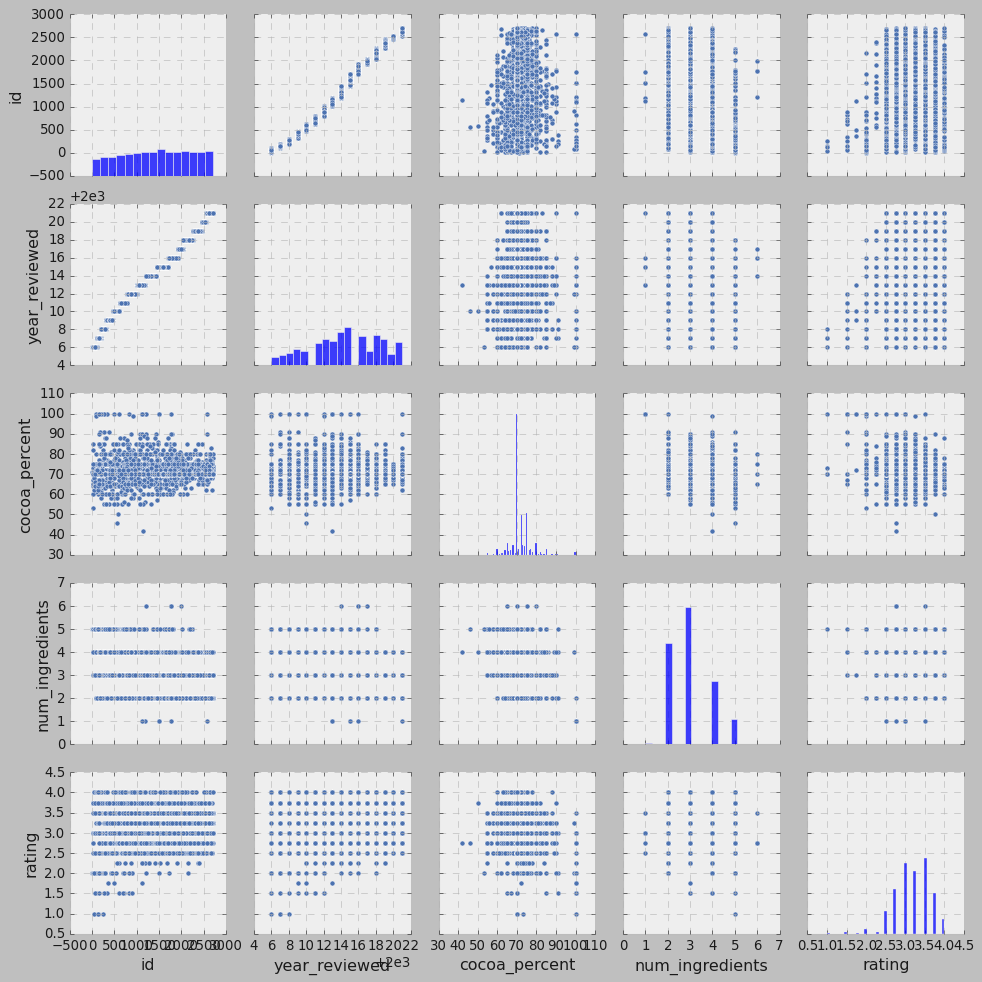

In [186]:
sns.pairplot(chocolate)

In [34]:
# 1. What is the average rating by country of origin?
chocolate.groupby('bean_origin').rating.mean().sort_values(ascending=False)
average_rating

bean_origin
Tobago                   3.625000
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
                           ...   
Sierra Leone             2.750000
St.Vincent-Grenadines    2.750000
Principe                 2.750000
Martinique               2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

# Question 2

In [103]:
#2. How many bars were reviewed for each of those countries?
chocolate.groupby('bean_origin').bar_name.count().sort_values(ascending=False)

bean_origin
Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Suriname                   1
Sumatra                    1
Sulawesi                   1
St.Vincent-Grenadines      1
Principe                   1
Name: bar_name, Length: 62, dtype: int64

# Question 3

In [85]:
#Data Visualization of Question 1
average_rating = pd.DataFrame(chocolate.groupby('bean_origin').rating.mean().sort_values(ascending=False))
average_rating

,rating
bean_origin,
Tobago,3.625000
China,3.500000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
...,...
Sierra Leone,2.750000
St.Vincent-Grenadines,2.750000
Principe,2.750000


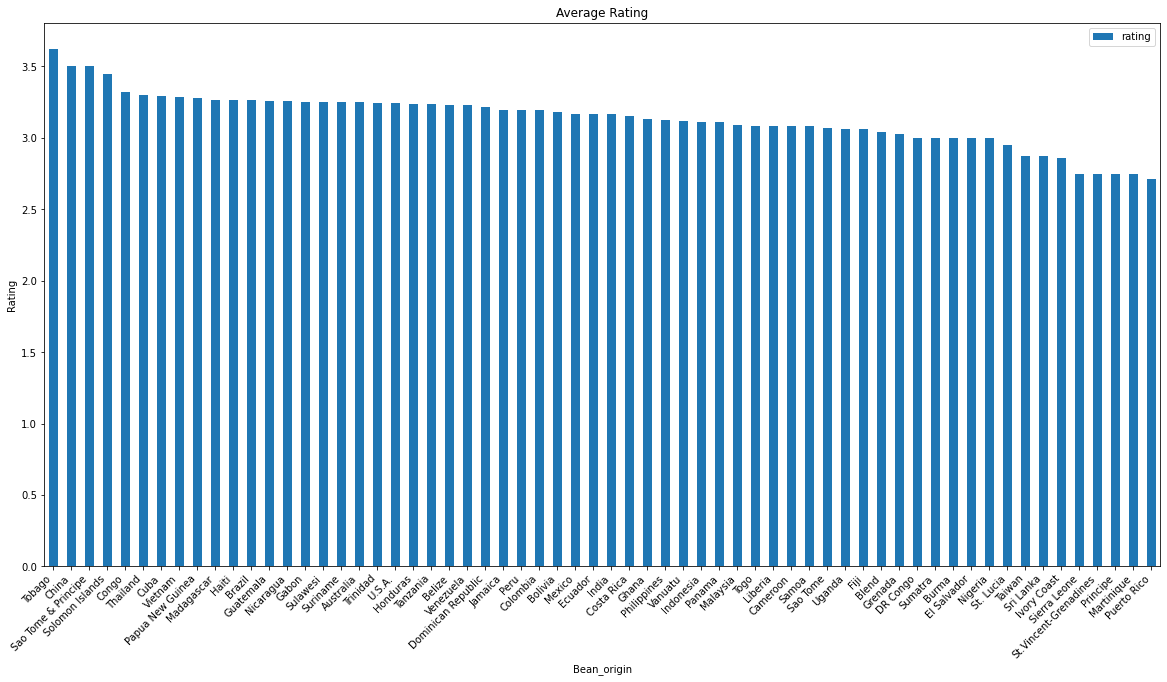

In [87]:
#average rating graph

average_rating.plot.bar(figsize=(20,10))

plt.title('Average Rating')
plt.xlabel('Bean_origin')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha="right")

plt.show()

In [131]:
#Data Visualization of Question 1 method 2

average_rating1 = pd.DataFrame(chocolate.groupby('bean_origin').rating.mean().sort_values(ascending=False))
average_rating1['bean_origin'] = average_rating1.index
average_rating1

,rating,bean_origin
bean_origin,,
Tobago,3.625000,Tobago
China,3.500000,China
Sao Tome & Principe,3.500000,Sao Tome & Principe
Solomon Islands,3.450000,Solomon Islands
Congo,3.318182,Congo
...,...,...
Sierra Leone,2.750000,Sierra Leone
St.Vincent-Grenadines,2.750000,St.Vincent-Grenadines
Principe,2.750000,Principe


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tobago'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Sao Tome & Principe'),
  Text(3, 0, 'Solomon Islands'),
  Text(4, 0, 'Congo'),
  Text(5, 0, 'Thailand'),
  Text(6, 0, 'Cuba'),
  Text(7, 0, 'Vietnam'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Madagascar')])

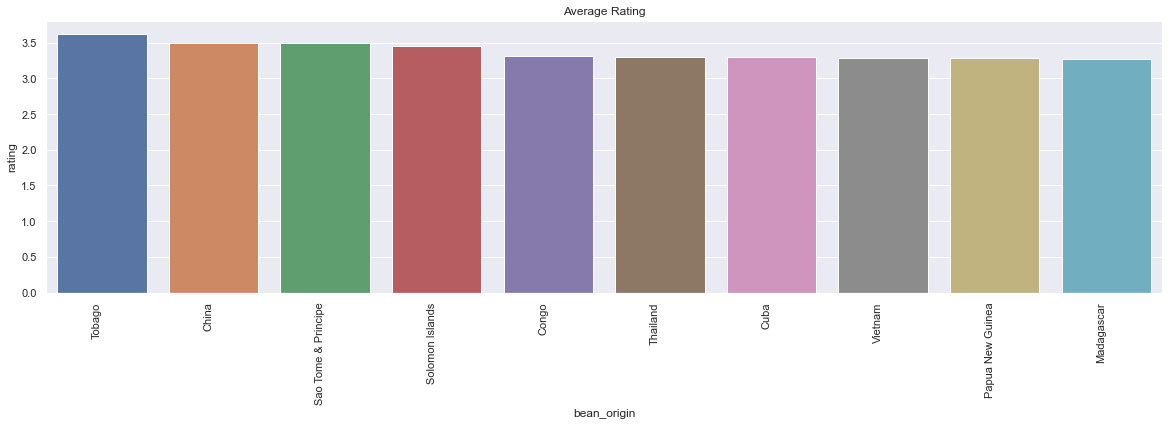

In [135]:
plt.title('Average Rating')
average_viz= sns.barplot(x='bean_origin', y='rating', data=average_rating1[0:10])
plt.xticks(rotation=90, ha="right")


In [142]:
#Bars reviewed by countries Vizualization
bars_review = chocolate.groupby('bean_origin').bar_name.count().reset_index().sort_values(by='bar_name',ascending=False)
bars_review



,bean_origin,bar_name
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


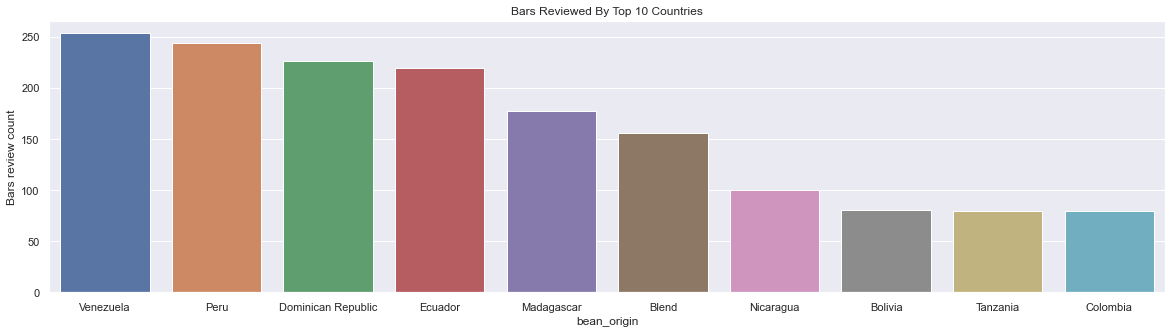

In [144]:
plt.title('Bars Reviewed By Top 10 Countries')
sns.barplot(x="bean_origin", y="bar_name", data=bars_review[0:10])

plt.ylabel('Bars review count')
plt.show()

# Question 4
Is the cacao bean's origin an indicator of quality?

C:\Users\zifer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zifer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zifer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zifer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zifer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points

<AxesSubplot:xlabel='rating', ylabel='cocoa_percent'>

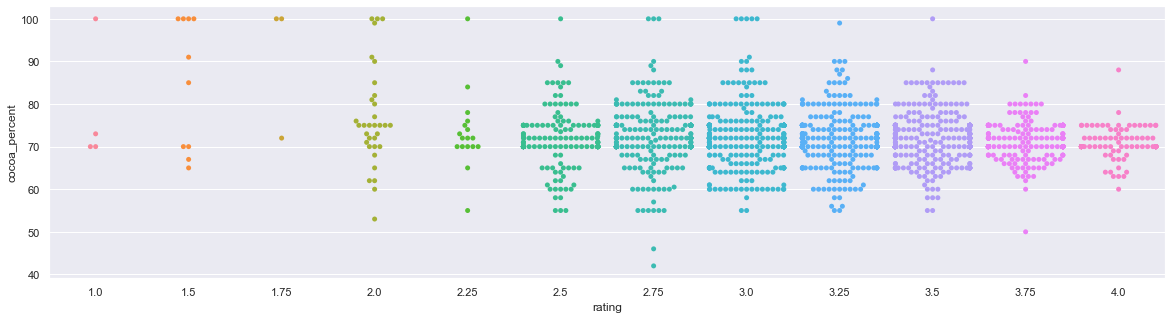

In [148]:
#ploting bean_origin against quality

sns.swarmplot(x="rating", y="cocoa_percent", data=chocolate)

<AxesSubplot:xlabel='bean_origin', ylabel='rating'>

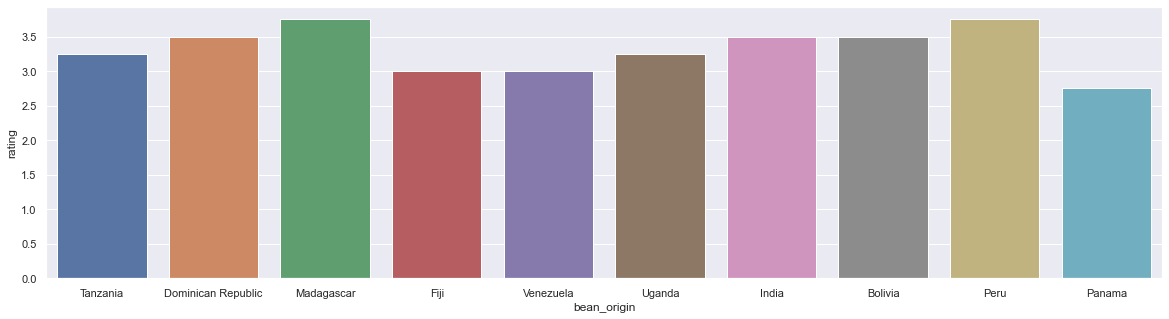

In [171]:
#ploting bean_origin against quality

sns.barplot(x="bean_origin", y="rating", data=chocolate[0:10])

# Question 5
How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

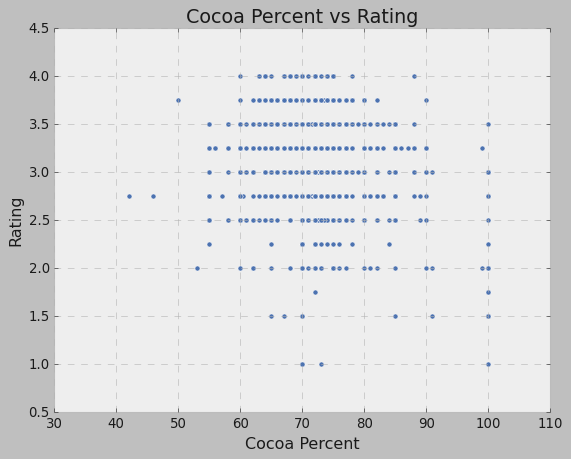

In [183]:
# Display Cocoa Content vs Rating
plt.style.use('bmh')
sns.scatterplot(data=chocolate, x='cocoa_percent', y='rating')
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')

plt.show()

In [175]:
# What is the average cocoa content for bars with higher ratings (above 3.5)
#avg_cocoa_content = chocolate.loc[df['rating']>3.5]['cocoa_percent'].mean()

avg_cocoa_content=chocolate[chocolate['rating']>=3.5].cocoa_percent.mean()
avg_cocoa_content

# Display correlation
#choco_bars.iloc[:, [6, -2]].corr(method='spearman')

71.10849539406345

# Question 6
Compare the average rating of bars with and without lecithin (L in the ingredients).

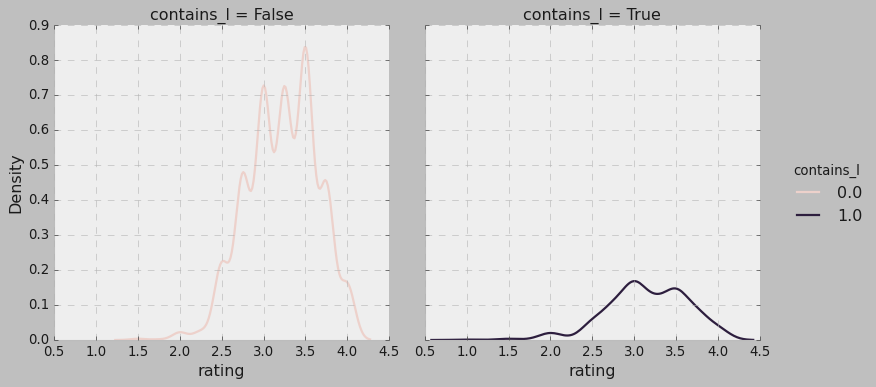

In [215]:
# Identify chocolates that contain lecithin
chocolate['contains_l'] = chocolate['ingredients'].str.contains(pat='L', case=True, regex=False)

# Display the distributions of ratings by lecithin presence
sns.displot(data=chocolate, x='rating', hue='contains_l', col='contains_l', kind="kde", color='blue')
plt.show()

In [210]:
bars_without_lec = choc[~choc["ingredients"].str.contains("L")].rating.mean()
print("Average rating without lecithin "+str(bars_without_lec))

Average rating without lecithin 3.2251282051282053


In [1]:
#ax[0,0].scatter(x=df['cocoa_percent'], y=df['rating'], color = 'cornflowerblue' ) # общий график
#ax[0,0].set_title('rating vs cocao percent')
#ax[0,0].set_xlabel('cocao percent')
#ax[0,0].set_ylabel('rating')

# Question 7
Conclusion

•This data set appears to have a time period between 2006 and 2021.
•The number of ingredients range from 1 to 6, the average rating of a chocolate bar is 3.2, and the average cocoa percent is roughly 71.5.
•Amongst the 2530 bars reviewed, Venezuela, Peru, Dominican Republic, Ecuador and Madagascar had the highest number of bars under review.
•This data does not show any clear relationship between percentage of cocoa in a bar and the rating of a bar, other factors might have an influence on rating.
•Bars without Lecitihin on average are rated higher than bars with Lecithin, this could be related to the widely held belief that Lecithin is often used as a ’mask' for poor quality Chocolate bars, although there is a negative correlation between the percent of cocoa in a bar and what that bar is rated, so ratings might be based on factors other than cocoa content/ ingredient content.
•The pairplot does not show any obvious relationship between the origin and quality(which was determined by rating, num_of_ingredients and cocoa percent) and so it is concluded that there is no obvious relationship between Bean Origin and Quality.